In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


Define business objective

In [2]:
# import our modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from operator import attrgetter 
import seaborn  as sns 

import warnings 
warnings.filterwarnings("ignore")

LOAD DATA 

In [3]:
dataset = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**order_id**: identifier untuk setiap pesanan yang ditempatkan oleh pelanggan.

**customer_id**: identifier untuk setiap pelanggan yang melakukan pesanan.

**order_status**: Kolom ini mencerminkan status pesanan, seperti "pending", "shipped", "delivered", dan lainnya.

**order_purchase_timestamp**: Ini adalah waktu dan tanggal ketika pesanan ditempatkan oleh pelanggan.

**order_approved_at**: Waktu dan tanggal ketika pesanan tersebut disetujui oleh sistem atau pihak penjual.

**order_delivered_carrier_date**: Ini adalah waktu dan tanggal ketika pesanan diambil oleh penyedia pengiriman atau kurir.

**order_delivered_customer_date**: Menunjukkan waktu dan tanggal ketika pesanan tiba dan diterima oleh pelanggan.

**order_estimated_delivery_date**: Ini adalah estimasi waktu dan tanggal pengiriman yang diharapkan oleh pelanggan ketika mereka melakukan pesanan

**EDA **

In [4]:
dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
dataset.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [6]:
dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
import pandas as pd 
# Ubah tipe data kolom tangga; dan waktu menjadi daterime 
dataset['order_purchase_timestamp'] = pd.to_datetime(dataset['order_purchase_timestamp'])
dataset['order_approved_at']= pd.to_datetime(dataset['order_approved_at'])
dataset['order_delivered_carrier_date']= pd.to_datetime(dataset['order_delivered_carrier_date'])
dataset['order_delivered_customer_date']= pd.to_datetime(dataset['order_delivered_carrier_date'])
dataset['order_estimated_delivery_date']= pd.to_datetime(dataset['order_estimated_delivery_date'])

In [9]:
#chek duplicate
dataset.duplicated().sum()

0

In [10]:
#rows and columns 
print("Rows:{},Columns:{}".format(dataset.shape[0],dataset.shape[1]))

Rows:99441,Columns:8


In [11]:
dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
#check missing value 
dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    1783
order_estimated_delivery_date       0
dtype: int64

In [13]:
# check missing value detail for columns order_apporved 
missing_order_approved = dataset[dataset['order_approved_at'].isnull()]
print(missing_order_approved)


                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      

In [14]:
# Menghapus baris-baris dengan missing values pada kolom yang dipilih
dataset_cleaned = dataset.dropna(subset=['order_approved_at'])

In [15]:
# check missing value detail for columns order_delivered_carrier_date
mising_order_delivered_carrier_date = dataset[dataset['order_delivered_carrier_date'].isnull()]
print(mising_order_delivered_carrier_date)


                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
324    d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp   order_approved_at  \
6       

In [16]:
# Menghapus baris- baris dengan misisng values pada kolom yang terpilih 
dataset_cleaned_2 = dataset.dropna(subset=['order_delivered_carrier_date'])

In [17]:
# check missing value detail for columns order_apporved 
missing_order_delivered_customer_date  = dataset[dataset['order_delivered_customer_date'].isnull()]
print(missing_order_delivered_customer_date)

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
324    d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp   order_approved_at  \
6       

In [18]:
# Menghapus baris- baris dengan misisng values pada kolom yang terpilih 
dataset_cleaned_3 = dataset.dropna(subset=['order_delivered_customer_date'])

In [19]:
# Check missing value 
dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    1783
order_estimated_delivery_date       0
dtype: int64

In [20]:
dataset = dataset_cleaned_3

In [21]:
data = dataset_cleaned_3 

In [22]:
data.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [23]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = data.shape
print(f"Jumlah baris (data) dalam dataset: {jumlah_baris}")


Jumlah baris (data) dalam dataset: 97658


In [24]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = data.shape
print(f"Jumlah baris (data) dalam dataset: {jumlah_baris}")


Jumlah baris (data) dalam dataset: 97658


In [25]:
# Menghapus baris-baris dengan missing values pada kolom yang dipilih
dataset_cleaned = dataset.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Baris-baris dengan missing values telah dihapus


In [26]:
dataset_cleaned.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [27]:
# Menampilkan jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = dataset_cleaned.shape
print(f"Jumlah baris (data) dalam dataset: {jumlah_baris}")


Jumlah baris (data) dalam dataset: 97644


In [28]:
dataset_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-07-26 14:31:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-08 13:50:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-11-22 13:39:59,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-14 19:46:34,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-10 11:18:03,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-07 23:22:42,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-08-28 20:52:26,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-12 15:35:03,2018-02-15


In [29]:
dataset_cleaned.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Descriptive Statistics 

In [30]:
dataset_cleaned.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,97644,97644,97644,97644,97644
mean,2018-01-01 17:19:08.711339264,2018-01-02 03:36:36.634826240,2018-01-04 22:55:51.933677312,2018-01-04 22:55:51.933677312,2018-01-25 11:22:55.494653952
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-08 10:34:01,2016-10-04 00:00:00
25%,2017-09-13 20:53:43.750000128,2017-09-14 08:15:17.750000128,2017-09-15 23:45:44.750000128,2017-09-15 23:45:44.750000128,2017-10-05 00:00:00
50%,2018-01-20 19:59:57,2018-01-22 13:49:16.500000,2018-01-24 16:38:54,2018-01-24 16:38:54,2018-02-16 00:00:00
75%,2018-05-05 10:40:56.750000128,2018-05-05 16:53:35,2018-05-08 13:40:00,2018-05-08 13:40:00,2018-05-28 00:00:00
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-09-11 19:48:28,2018-10-25 00:00:00


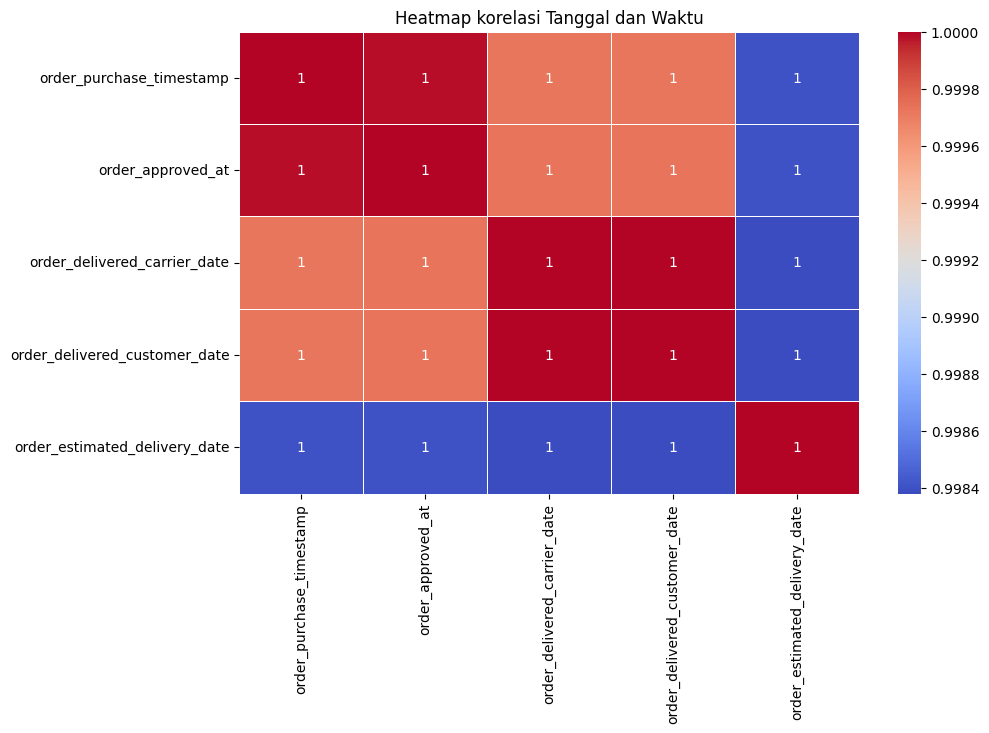

In [31]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# Membuat DataFrame yang hanya berisi kolom tanggal dan waktu 
date_columns = dataset_cleaned[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']]

# Membuat matriks korelasi 
correlation_matrix = date_columns.corr()

# Menggambarkan matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap korelasi Tanggal dan Waktu')
plt.show()

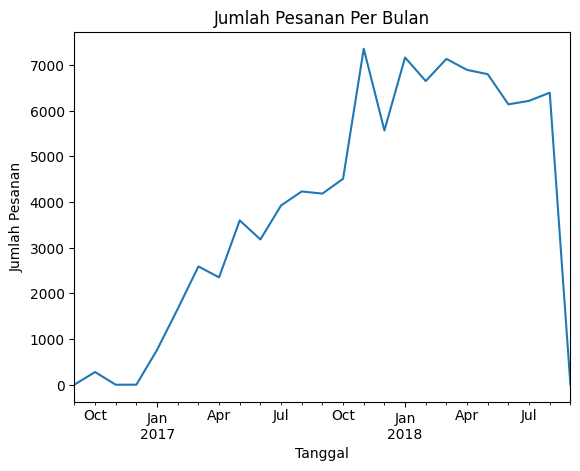

In [32]:
import matplotlib.pyplot as plt 
# Membuat time series plot jumlah pesanan per bulan
dataset_cleaned['order_purchase_timestamp'] = pd.to_datetime(dataset_cleaned['order_purchase_timestamp'])
montly_orders = dataset_cleaned.set_index('order_purchase_timestamp')['order_id'].resample('M').count()
montly_orders.plot(kind= 'line', title ='Jumlah Pesanan Per Bulan')
plt.xlabel("Tanggal")
plt.ylabel('Jumlah Pesanan')
plt.show()




Jumlah pesanan per bulan 

Trend Peningkatan Pesanan: Dalam dua tahun terakhir, terdapat tren peningkatan jumlah pesanan produk setiap bulan. Puncak peningkatannya terjadi pada bulan Oktober tahun 2017, dengan peningkatan sekitar 7000 unit pesanan dibandingkan dengan bulan-bulan sebelumnya.

Fluktuasi Jumlah Pesanan: Meskipun ada tren peningkatan pesanan secara keseluruhan, ada fluktuasi bulanan dalam jumlah pesanan. Pada bulan Oktober 2017, meskipun terjadi peningkatan signifikan, terdapat penurunan sebesar 1000 unit pesanan dibandingkan dengan bulan sebelumnya.

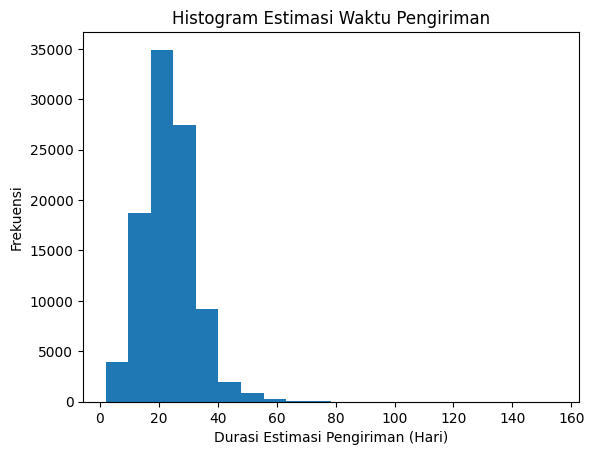

In [33]:
import matplotlib.pyplot as plt 
# Membuat histogram estimasi waktu  pengiriman 
dataset_cleaned['order_estimated_delivery_date'] = pd.to_datetime(dataset_cleaned['order_estimated_delivery_date'])
dataset_cleaned['estimated_delivery_duration'] = (dataset_cleaned['order_estimated_delivery_date'] - dataset_cleaned ['order_purchase_timestamp']).dt.days
plt.hist(dataset_cleaned['estimated_delivery_duration'], bins=20)
plt.title('Histogram Estimasi Waktu Pengiriman')
plt.xlabel('Durasi Estimasi Pengiriman (Hari)')
plt.ylabel('Frekuensi')
plt.show()

In [34]:
dataset_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_delivery_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-18,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-07-26 14:31:00,2018-08-13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-08 13:50:00,2018-09-04,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-11-22 13:39:59,2017-12-15,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-14 19:46:34,2018-02-26,12
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-10 11:18:03,2017-03-28,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-07 23:22:42,2018-03-02,23
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-08-28 20:52:26,2017-09-27,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-12 15:35:03,2018-02-15,37


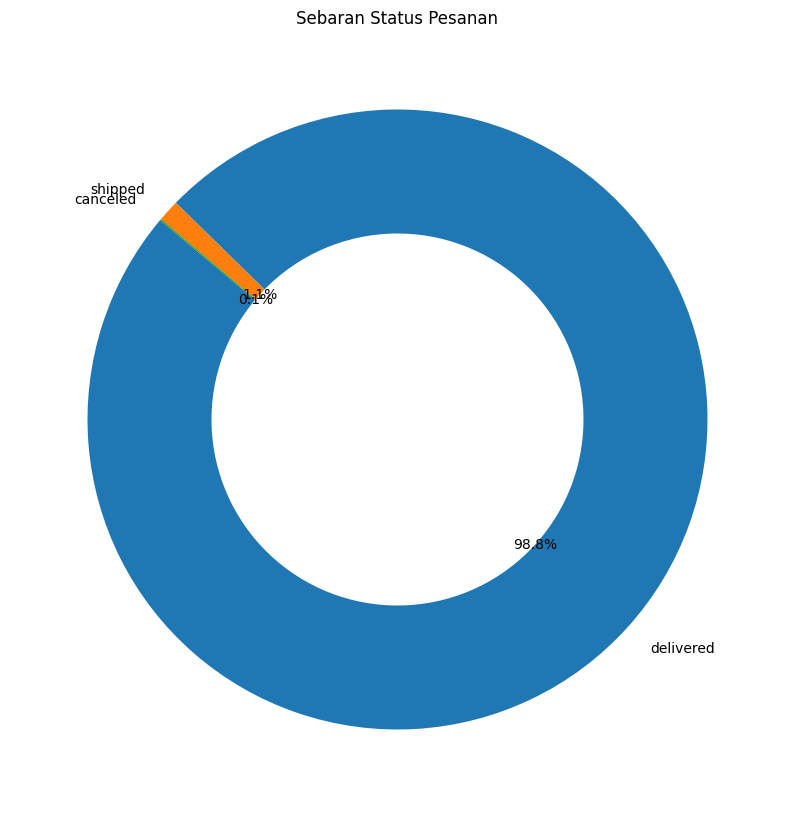

In [54]:
plt.figure(figsize=(10, 15))
status_counts = dataset_cleaned['order_status'].value_counts()
# Tambahkan parameter wedgeprops untuk mengatur lebar cincin donat
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Sebaran Status Pesanan')
plt.show()


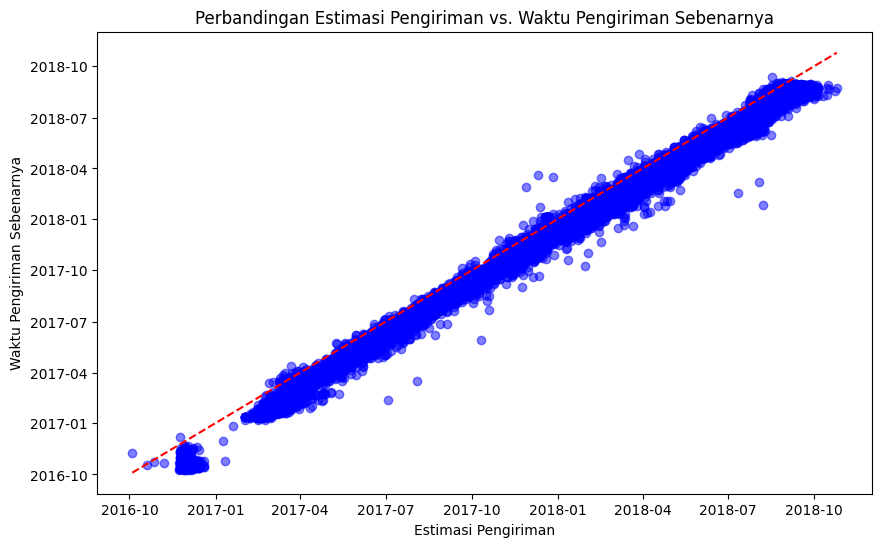

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom waktu ke format datetime
dataset_cleaned['order_delivered_customer_date'] = pd.to_datetime(dataset_cleaned['order_delivered_customer_date'])
dataset_cleaned['order_estimated_delivery_date'] = pd.to_datetime(dataset_cleaned['order_estimated_delivery_date'])

# Membuat scatter plot dengan peningkatan visual
plt.figure(figsize=(10, 6))
plt.scatter(dataset_cleaned['order_estimated_delivery_date'], dataset_cleaned['order_delivered_customer_date'], color='blue', alpha=0.5)
plt.title('Perbandingan Estimasi Pengiriman vs. Waktu Pengiriman Sebenarnya')
plt.xlabel('Estimasi Pengiriman')
plt.ylabel('Waktu Pengiriman Sebenarnya')

# Menambahkan garis diagonal sebagai referensi
plt.plot([dataset_cleaned['order_estimated_delivery_date'].min(), dataset_cleaned['order_estimated_delivery_date'].max()],
         [dataset_cleaned['order_estimated_delivery_date'].min(), dataset_cleaned['order_estimated_delivery_date'].max()],
         color='red', linestyle='--')

plt.show()


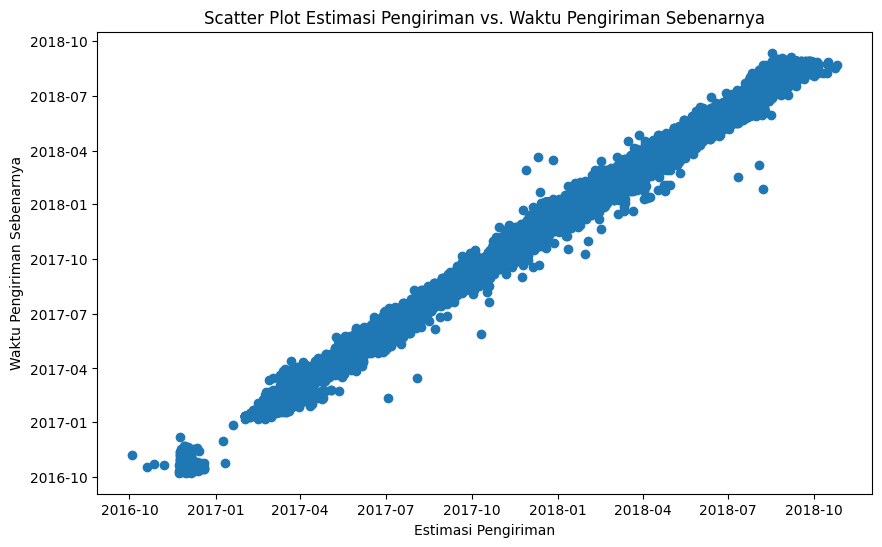

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_cleaned['order_estimated_delivery_date'], dataset_cleaned['order_delivered_customer_date'])
plt.title('Scatter Plot Estimasi Pengiriman vs. Waktu Pengiriman Sebenarnya')
plt.xlabel('Estimasi Pengiriman')
plt.ylabel('Waktu Pengiriman Sebenarnya')
plt.show()


In [57]:
# Menghitung jumlah pesanan dengan estimasi akurat (titik dekat dengan garis diagonal)
accurate_estimates = ((dataset_cleaned['order_delivered_customer_date'] - dataset_cleaned['order_estimated_delivery_date']).dt.total_seconds() >= 0).sum()

# Menghitung total jumlah pesanan dalam dataset
total_orders = len(dataset_cleaned)

# Menghitung persentase estimasi akurat
percentage_accurate_estimates = (accurate_estimates / total_orders) * 100

# Mencetak hasil
print(f'Jumlah pesanan dengan estimasi akurat: {accurate_estimates} dari {total_orders}')
print(f'Persentase estimasi akurat: {percentage_accurate_estimates:.2f}%')


Jumlah pesanan dengan estimasi akurat: 473 dari 97644
Persentase estimasi akurat: 0.48%
